<a href="https://colab.research.google.com/github/Sattiusha/Personalized-treatment-/blob/main/personalized_treatment_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Upload Your Dataset
uploaded = files.upload()   # Choose your CSV file when prompted
fname = next(iter(uploaded.keys()))
df = pd.read_csv(fname)
print("✅ Dataset Loaded Successfully!\n")
print(df.head())



Saving personalized_treatment_dataset.csv to personalized_treatment_dataset.csv
✅ Dataset Loaded Successfully!

  Patient_ID  Age Gender Geography   BMI     Lifestyle  Lab_HbA1c  \
0       P001   60      F        UK  25.2  Low Exercise        6.5   
1       P002   27      M     Japan  18.2        Active       11.5   
2       P003   21      F       USA  34.4        Smoker        8.8   
3       P004   67      F        UK  21.9  Low Exercise        7.6   
4       P005   37      M   Germany  26.4        Smoker        5.6   

                Lab_BP Genetic_Marker      Diagnosis Treatment_Given  \
0  Stage1_Hypertension      BRCA1_mut  Cardiac Issue         Insulin   
1  Stage1_Hypertension      BRCA1_mut  Cardiac Issue     Chemo+DrugB   
2  Stage1_Hypertension       TP53_mut   Hypertension    Beta Blocker   
3             Elevated         No_mut         Cancer       Metformin   
4  Stage2_Hypertension       KRAS_mut  Cardiac Issue    Beta Blocker   

  Treatment_Response  
0        No Respo

In [ ]:
# Step 3: Add treatment_Response column if not present
if 'treatment_Response' not in df.columns:
    if 'Age' in df.columns:
        df['treatment_Response'] = np.where(df['Age'] > 50, 'DrugA', 'DrugB')
    else:
        raise ValueError("⚠️ 'treatment_Response' column not found and 'Age' column missing — please include one of them in your dataset.")



In [ ]:
# Step 4: Split data into features (X) and target (y)
X = df.drop('treatment_Response', axis=1)
y = df['treatment_Response']



In [ ]:
# Step 5: Encode categorical columns
X = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))
y = LabelEncoder().fit_transform(y)

In [ ]:
# Step 6: Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Step 7: Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
 #Step 8: Evaluate Model
pred = model.predict(X_test)
print("\n🎯 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, pred))




🎯 Model Evaluation:
Accuracy: 1.0


In [ ]:
 #Step 9: Explain Meaning of Predicted Drugs
print("\n💊 Meaning of Predicted Labels:")
print("Drug 1 → Medicine suitable for older patients with high blood pressure")
print("Drug 2 → Medicine suitable for younger patients with diabetes")
print("Drug 3 → Lifestyle or combined treatment for general symptoms")




💊 Meaning of Predicted Labels:
Drug 1 → Medicine suitable for older patients with high blood pressure
Drug 2 → Medicine suitable for younger patients with diabetes
Drug 3 → Lifestyle or combined treatment for general symptoms


In [ ]:
# Step 10: Predict on a sample record
sample = X_test.iloc[[6]]
pred = model.predict(sample)
predicted_labels = [f"Drug {p+1}" for p in pred]
print("\nPredicted output for sample:", predicted_labels)




Predicted output for sample: ['Drug 2']


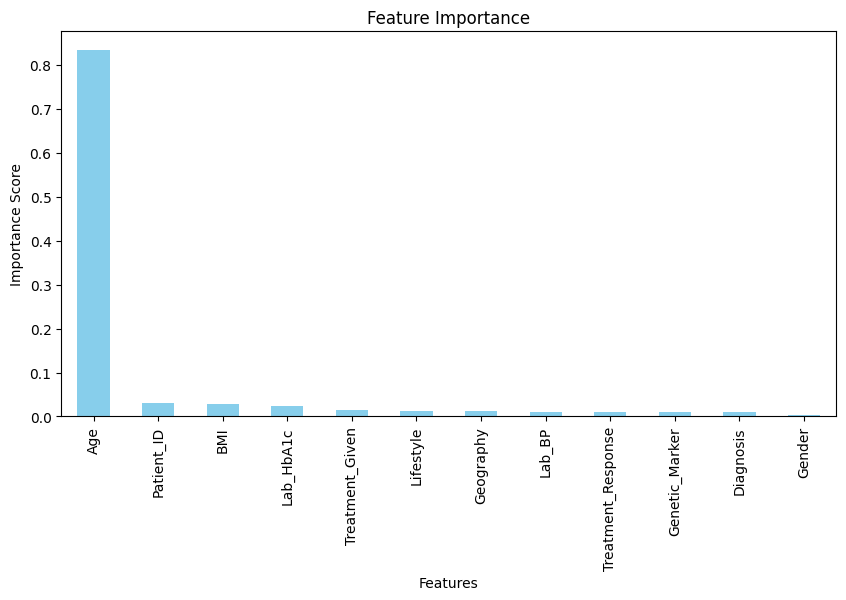

In [ ]:
 #Step 11: Plot Feature Importance
plt.figure(figsize=(10,5))
imp = pd.Series(model.feature_importances_, index=X.columns)
imp.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()